In [1]:
%matplotlib inline
from vegas_game_predictions import *
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 150)

_, df = get_data(2022)
print(df.head(10))

  team_name_abbr_home week_num game_num_home team_name_abbr_away          cover  plays_defense_home  plays_offense_home ou_result  over_under  \
0                 ARI        1             1                 KAN  did not cover                66.0                63.0      over        54.0   
1                 WAS        1             1                 JAX        covered                62.0                70.0      over        43.0   
2                 TEN        1             1                 NYG  did not cover                58.0                60.0     under        44.0   
3                 SEA        1             1                 DEN        covered                64.0                49.0     under        44.5   
4                 NYJ        1             1                 BAL  did not cover                53.0                79.0     under        44.0   
5                 MIN        1             1                 GNB        covered                61.0                61.0     under 

# Data Distributions

The distributions of numerical features.  Fantasy points seem to follow a Gamma distribution, a fact that can hopefully be exploited in prediction efforts.

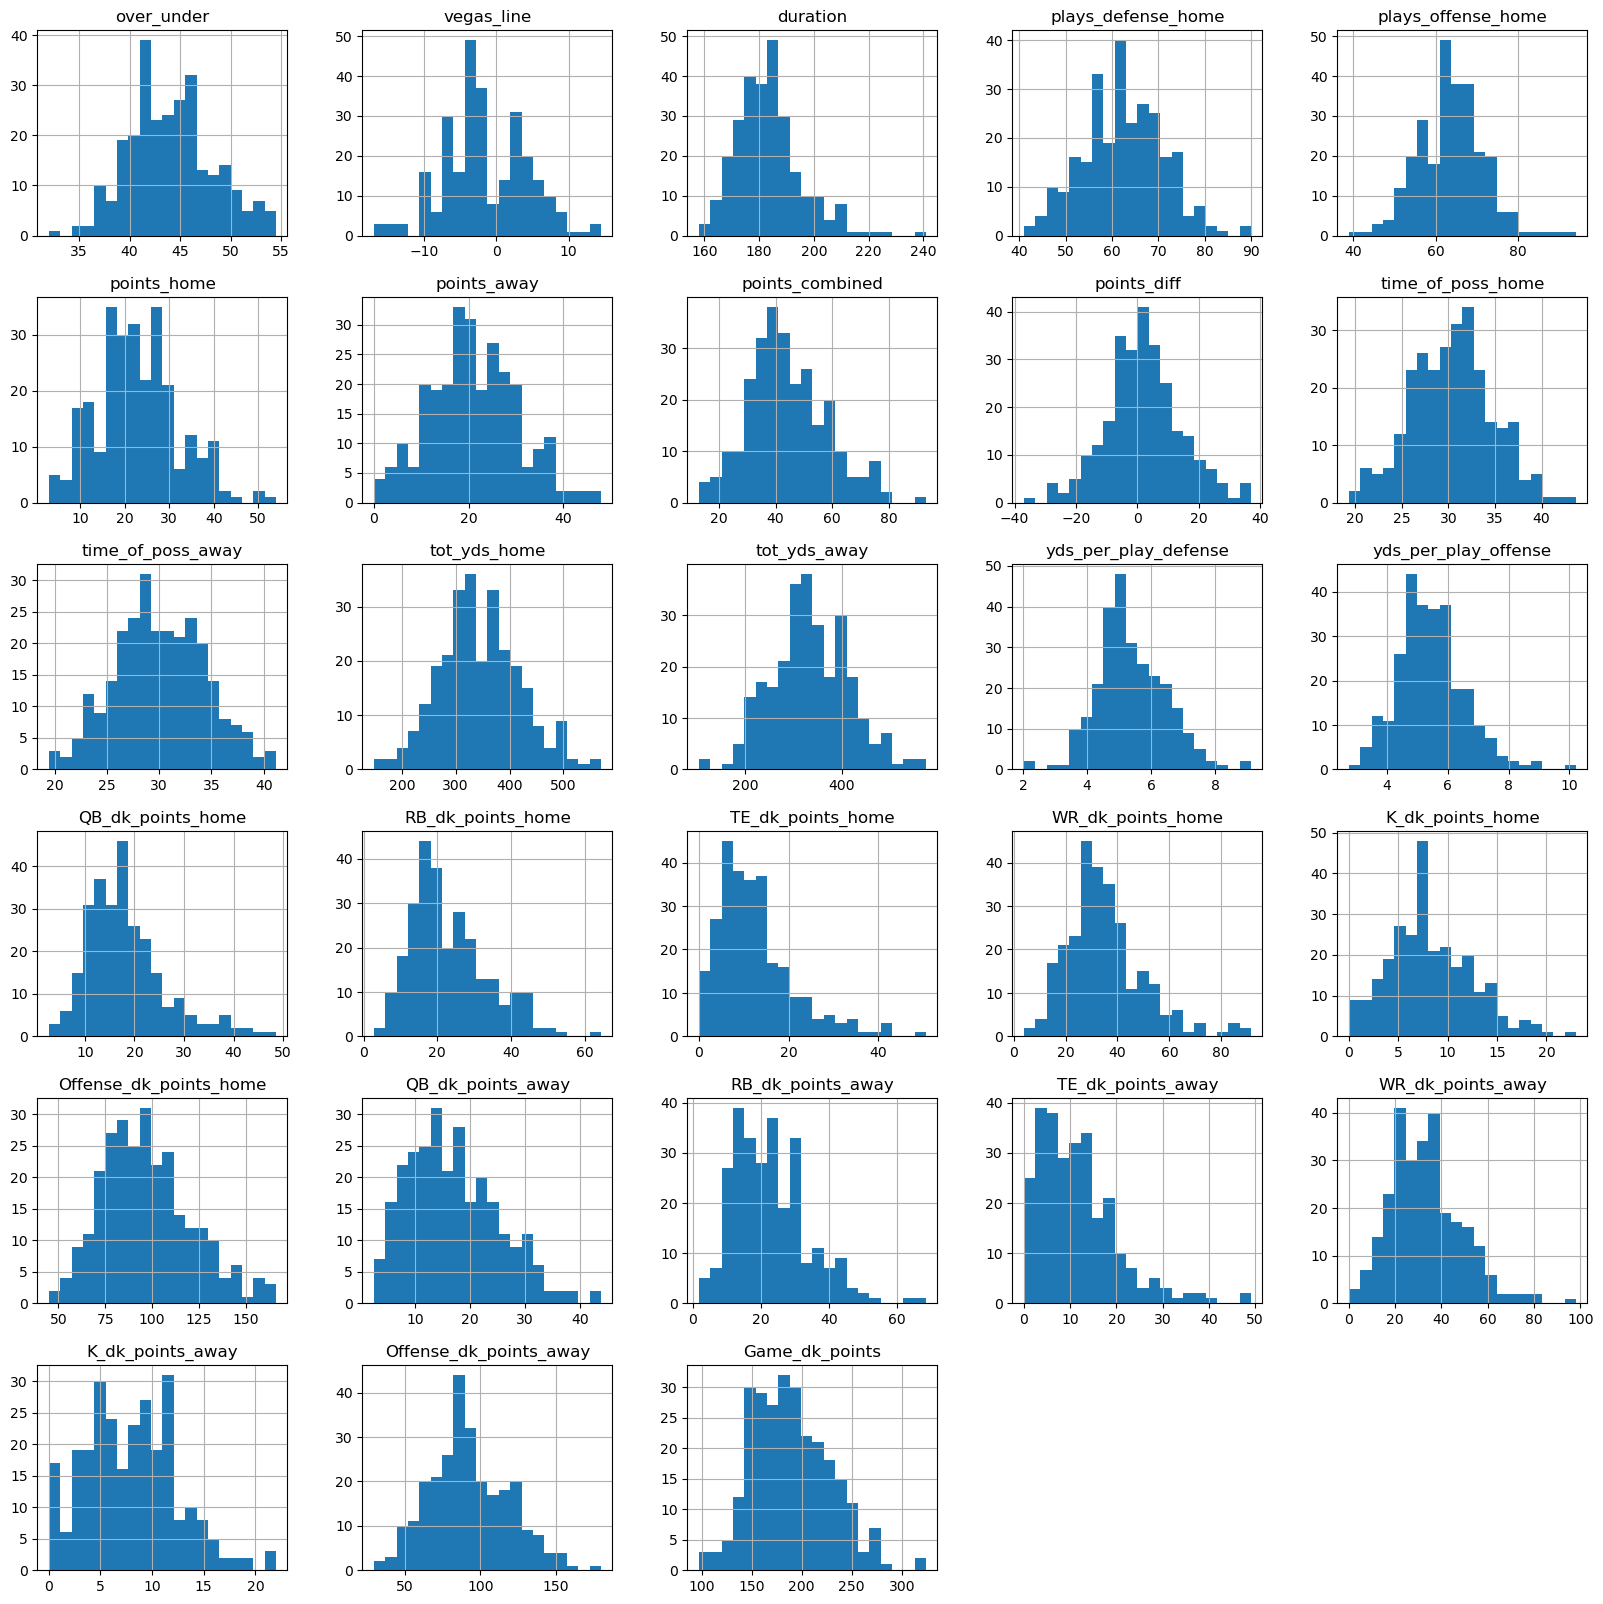

In [2]:
NUMERICAL_COLUMNS = [
    'over_under', 'vegas_line', 'duration', 'plays_defense_home', 'plays_offense_home', 'points_home', 'points_away',
    'points_combined', 'points_diff', 'time_of_poss_home', 'time_of_poss_away', 'tot_yds_home', 'tot_yds_away',
    'yds_per_play_defense', 'yds_per_play_offense',
    'QB_dk_points_home', 'RB_dk_points_home', 'TE_dk_points_home', 'WR_dk_points_home', 'K_dk_points_home', 'Offense_dk_points_home',
    'QB_dk_points_away', 'RB_dk_points_away', 'TE_dk_points_away', 'WR_dk_points_away', 'K_dk_points_away', 'Offense_dk_points_away',
    'Game_dk_points'
]
df[NUMERICAL_COLUMNS].hist(bins=20, figsize=(20,20));

                        vegas_line  over_under  Offense_dk_points_home  Offense_dk_points_away  Game_dk_points
vegas_line                1.000000    0.121095               -0.244930                0.299885        0.051696
over_under                0.121095    1.000000                0.280119                0.294142        0.369384
Offense_dk_points_home   -0.244930    0.280119                1.000000                0.209491        0.753320
Offense_dk_points_away    0.299885    0.294142                0.209491                1.000000        0.800874
Game_dk_points            0.051696    0.369384                0.753320                0.800874        1.000000


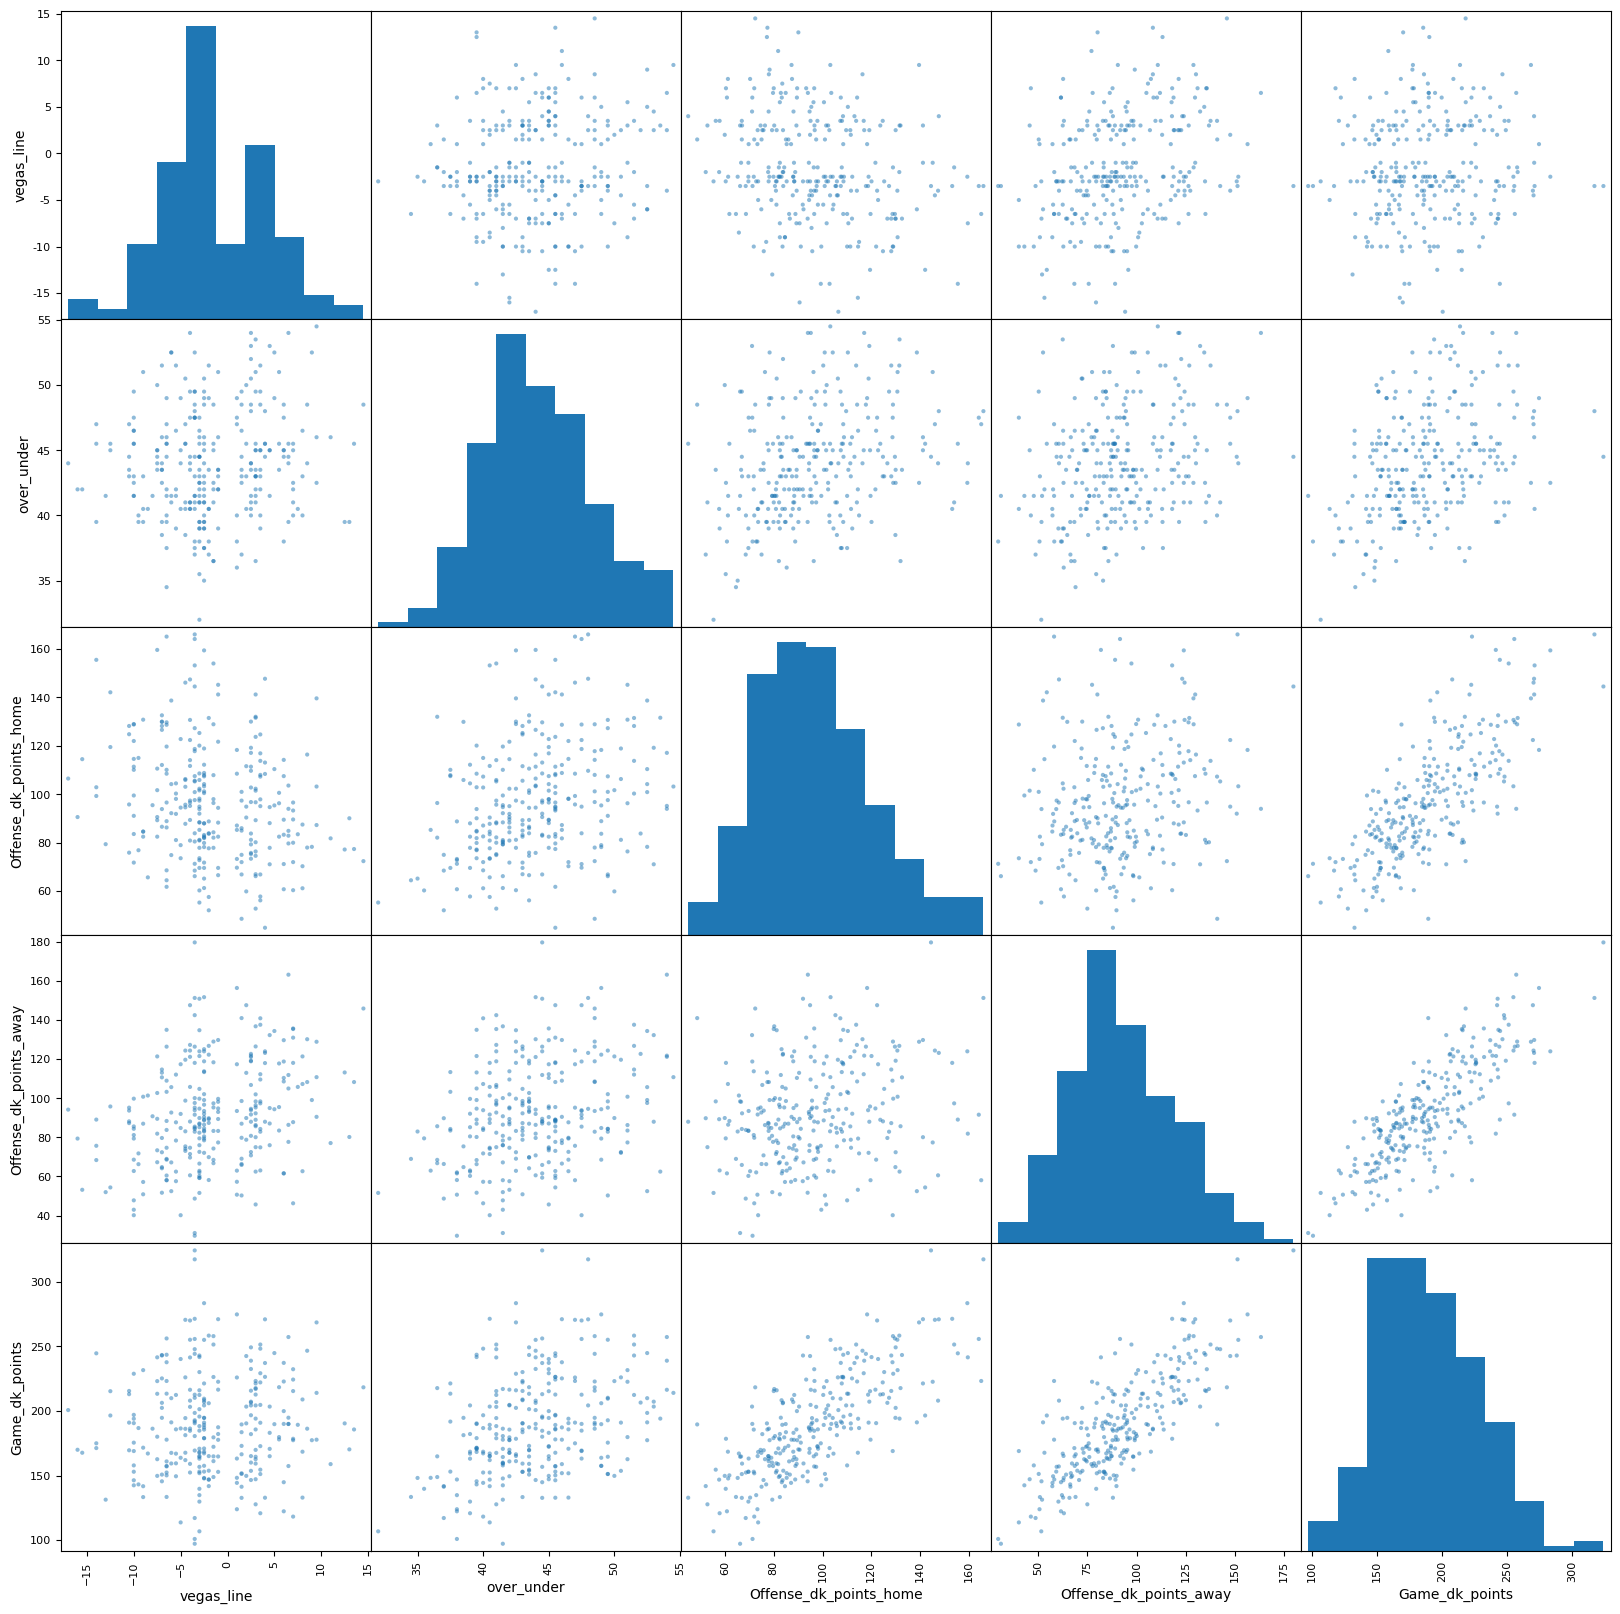

In [3]:
PRED_COLUMNS = [
    'vegas_line', 'over_under', 'Offense_dk_points_home', 'Offense_dk_points_away', 'Game_dk_points'
]

print(df[PRED_COLUMNS].corr())
scatter_matrix(df[PRED_COLUMNS], figsize=(20,20));